Veri √ñn ƒ∞≈üleme

Neden veri √∂n i≈üleme gerekli?
* Makine √∂ƒürenme algoritmalarƒ±nƒ±n √ßoƒüu (√∂zellikle mesafe tabanlƒ± ve lineer modeller) √∂zelliklerin  √∂l√ßeklerinden etkilenir.
* Bazƒ± modeller (√∂rneƒüin KNN, SVM, LogisticRegression, SGD, SVR, MLP) d√ºzg√ºn √ßalƒ±≈ümak i√ßin √∂l√ßeklenmi≈ü veri ister.
* Decision Tree ve Random Forest gibi modeller ise √∂l√ßeklendirmeden pek etkilenmez.

√ñƒüreneceklerimiz:
1. StandardScaler (Z-normalizasyonu)
* Her √∂zelliƒüi ortalamayƒ± 0, std sapmayƒ± 1 yapar.
* Daƒüƒ±lƒ±m normal ise tercih edilir.
* En √ßok kullanƒ±landƒ±r.

2. MinMaxScaler
* Verileri 0-1 aralƒ±ƒüƒ±na sƒ±kƒ±≈ütƒ±rƒ±r.
* Daƒüƒ±lƒ±m normal deƒüilse ya da dƒ±≈ülama istenmiyorsa g√ºzel bir √ß√∂z√ºmd√ºr.
* √ñzellikle sinir aƒülarƒ±nda pop√ºlerdir.

In [4]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

# Veri setini y√ºkle
data = fetch_california_housing()
X = data.data
y = data.target

# Eƒüitim ve test setine ayƒ±r
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline: √ñl√ßekleme + Model
pipeline = make_pipeline(StandardScaler(), LinearRegression())
pipeline.fit(X_train, y_train)

# Tahmin yap ve ba≈üarƒ±ya bak
y_pred = pipeline.predict(X_test)
print("R2 Skoru (StandardScaler):", r2_score(y_test, y_pred))

R2 Skoru (StandardScaler): 0.575787706032451


≈ûimdi aynƒ± veriyi bu kez MinMaxScaler() ile √∂l√ßeklendirelim ve modelin performansƒ±nƒ± kar≈üƒ±la≈ütƒ±ralƒ±m. Bu ≈üekilde √∂l√ßeklendirme t√ºrlerinin model performansƒ±na etkisini g√∂relim√ß

In [5]:
from sklearn.preprocessing import MinMaxScaler

#Pipeline: MinMaxScaler + LinearRegression
pipeline_minmax = make_pipeline(MinMaxScaler(), LinearRegression())
pipeline_minmax.fit(X_train, y_train)

#tahmin ve degerlendirme
y_pred_minmax = pipeline_minmax.predict(X_test)

print("R2 Skoru (MinMaxScaler):", r2_score(y_test, y_pred))

R2 Skoru (MinMaxScaler): 0.575787706032451


Sonu√ßlar model ve veri setine g√∂re deƒüi≈üebilir ama genel fikir ≈üudur:
* Veriler normal daƒüƒ±lƒ±ma yakƒ±nsa => StandardScaler daha iyi sonu√ß verir.
* Verilerƒ±n daƒüƒ±lƒ±mƒ± dengesizse ya da dƒ±≈ü deƒüerler varsa => MinMaxScaler daha istikrarlƒ± olabilir.

Bizim sonu√ßlar:
* Verilerin √∂l√ßeklenme y√∂nteminden etkilenmeyecek kadar dengeli bir daƒüƒ±lƒ±ma sahip olduƒüu anlamƒ±na gelir.
* Linear Regression gibi √∂l√ßeklemeye duyarlƒ± bir modelde bile bu fark olu≈ümadƒ±ysa muhtemelen √∂zellikler zaten benzer √∂l√ßektedir.

Makine √ñƒürenmesi, sayƒ±larƒ± sever ama veri setlerimizde bazen "≈üehir", "renk", "cinsiyet" gibi kategorik (yazƒ±sal) veriler olur. Bu a≈üamada LabelEncoder ve OneHotEncoder devreye giriyor.

LabelEncoder - Etiketleme Y√∂ntemi
* Her kategoriye tek bir sayƒ± verir.
* √ñrnek: ["kadƒ±n", "erkek", "diƒüer"] => [0, 1, 2]
* Genellikle hedef deƒüi≈üken (y) i√ßin kullanƒ±lƒ±r.
* √ñzellikler i√ßin doƒürudan kullanmak yanƒ±ltƒ±cƒ± olabilir √ß√ºnk√º modeller sayƒ±sal b√ºy√ºkl√ºƒü√º √∂nemser.

In [7]:
from sklearn.preprocessing import LabelEncoder

cinsiyet = ["kadin", "erkek", "kadin", "diger", "erkek"]
le = LabelEncoder()
cinsiyet_encoded = le.fit_transform(cinsiyet)

print("Kodlanmis:", cinsiyet_encoded)
print("Siralama:", list(le.classes_))

Kodlanmis: [2 1 2 0 1]
Siralama: ['diger', 'erkek', 'kadin']


OneHotEncoder - One-Hot Kodlama
* Her kategoriye ayrƒ± bir s√ºtun a√ßar.
* √ñrnek: ["kƒ±rmƒ±zƒ±", "mavi", "ye≈üil"] => kƒ±rmƒ±zƒ± = [1, 0, 0], mavi = [0, 1, 0], ye≈üil = [0, 0, 1]
* √ñzellik s√ºtunlarƒ± (X) i√ßin idealdir.

In [9]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

renk = np.array([["kirmizi"], ["mavi"], ["kirmizi"], ["yesil"]])
ohe = OneHotEncoder(sparse_output = False)
renk_encoded = ohe.fit_transform(renk)

print("One-Hot Encoded:\n", renk_encoded)
print("Sutunlar:", ohe.get_feature_names_out())

One-Hot Encoded:
 [[1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]
Sutunlar: ['x0_kirmizi' 'x0_mavi' 'x0_yesil']


Ne zaman hangisini kullanmalƒ±yƒ±z?
| Kullanƒ±m Durumu                | Uygun D√∂n√º≈üt√ºr√ºc√º                                              |
| ------------------------------ | -------------------------------------------------------------- |
| **Y hedef deƒüi≈üken**           | `LabelEncoder`                                                 |
| **X √∂zellik s√ºtunlarƒ± (kat.)** | `OneHotEncoder`                                                |
| √áok sayƒ±da kategori varsa      | `OneHotEncoder(drop='first')` kullanƒ±larak boyut azaltƒ±labilir |


Feature Engineering Nedir?

Feature Engineering, verideki ham bilgileri alƒ±p:
* Daha anlamlƒ±,
* Daha ayƒ±rt edici,
* Modelin i≈üini kolayla≈ütƒ±racak yeni √∂zellikler √ºretmektir.

Neden √ñnemli?

Makine √∂ƒürenmesinde modelin ba≈üarƒ±sƒ±,
* %80 veriye, %20 modele baƒülƒ±dƒ±r.
* Yani veriyi g√ºzel hazƒ±rlarsak sƒ±radan bir model bile harikalar yaratabilir.

Feature Engineering T√ºrleri
1. Yeni √ñzellik √úretimi
* Var olan √∂zelliklerden yeni bilgiler √ºretme
* √ñrn: Ya≈ü / Gelir, Fiyat / Oda Sayƒ±sƒ±, Yƒ±l - Doƒüum Yƒ±lƒ± = Ya≈ü
2. Binning (Aralƒ±klandƒ±rma)
* S√ºrekli deƒüerleri kategorilere d√∂n√º≈üt√ºrme
* √ñrn: Ya≈ü - Gen√ß, Yeti≈ükin, Ya≈ülƒ±
3. Etiket Kodlama (Label Encodeing)
* Kategorik deƒüi≈ükenleri sayƒ±ya √ßevirme
* √ñrn: Meslek - 0, 1, 2, 3...
4. Tekrar Sayƒ±mƒ± (Frequency Encodeing)
* Bir kategori verisinin veri setinde ka√ß kez ge√ßtiƒüini √∂zelliƒüe √ßevirme
5. Datetime √ñzellikleri Ayƒ±klama
* Tarihten yƒ±l, ay, g√ºn, hafta i√ßi gibi bilgiler √ßƒ±karma
6. Text Features (NLP i√ßinde)
* Karakter/kelime sayƒ±sƒ±, TF-IDF, n-gramlar, sentiment skorlarƒ± vb.

In [10]:
import pandas as pd

df = pd.DataFrame({
    'fiyat': [100000, 150000, 120000],
    'oda': [2, 3, 2]
})

#m^2 basina fiyat uretelim
df['fiyat_oda_basi'] = df['fiyat'] / df['oda']

print(df)

    fiyat  oda  fiyat_oda_basi
0  100000    2         50000.0
1  150000    3         50000.0
2  120000    2         60000.0


Ne zaman yapƒ±lƒ±r?
* Modelleme √∂ncesinde yapƒ±lƒ±r.
* Ama Pipeline i√ßinde de yapƒ±labilir. (√∂zellikle √∂zel transformerlarla)

Model Kalibrasyonu
* √ñzellikle olasƒ±lƒ±k tahmini yapan sƒ±nƒ±flandƒ±rma modelleri i√ßin √ßok √∂nemli bir a≈üamadƒ±r.
* Modelin sadece doƒüru sƒ±nƒ±fƒ± tahmin etmesi deƒüil, ne kadar emin olduƒüunu da d√ºzg√ºn ifade etmesi gerekir. ƒ∞≈üte bunun i√ßin kalibrasyon devreye girer.

Model Kalibrasyonu Nedir?
* Bazƒ± modeller tahmin sonucunda olasƒ±lƒ±k deƒüerleri verir (√∂rneƒüin: %80 ihtimalle 1. sƒ±nƒ±f). Ama bu olasƒ±lƒ±klar bazen a≈üƒ±rƒ± g√ºvenli ya da a≈üƒ±rƒ± temkinli olabilir. Kalibrasyon bu tahminleri ger√ßek g√∂zlemlerle hizzalamayƒ± saƒülar.
* √ñrneƒüin:
  * Model "%90 ihtimalle pozitif" dediƒüi √∂rneklerde ger√ßekten % 90 pozitif √ßƒ±kƒ±yor mu?
    * Eƒüer √ßƒ±kmƒ±yorsa modelin √ßƒ±ktƒ±larƒ± kalibre deƒüildir.
    
Neden √ñnemlidir?
* Tƒ±p, finans, kredi gibi alanlarda doƒüru olasƒ±lƒ±k tahmini √ßok kritiktir.
* "Bu ki≈üi %70 ihtimalle hastadƒ±r" demek, "Hasta" demekten daha hassas ve deƒüerlidir.
* √ñzellikle:
  * LogisticRegression
  * SVC (probability=True)
  * RandomForest
 
 gibi modellerde kalibrasyon fark yaratƒ±r.

Scikit-Learn ile Kalibrasyon

1. CalibratedClassifierCV (en yaygƒ±n y√∂ntem)

In [13]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import brier_score_loss
from sklearn.datasets import make_classification

#veriyi olustur
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

#egitim test veriyi bol
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#model ve kalibrasyon
base_model = LogisticRegression()
calibrated_model = CalibratedClassifierCV(base_model, cv=5)

calibrated_model.fit(X_train, y_train)
probs = calibrated_model.predict_proba(X_test)[:,1]

#brier skoru (ne kadar iyi kalibre edilmis)
print('Brier Skoru:', brier_score_loss(y_test, probs))

Brier Skoru: 0.1149678114072376


Kalibrasyon Eƒürisi (Reliability Curve)

Modelin kalibrasyon durumu grafik ile incelenebilir.
* Doƒüru kalibre edilmi≈ü modellerin eƒürisi y = x √ßizgisine yakƒ±n olur.

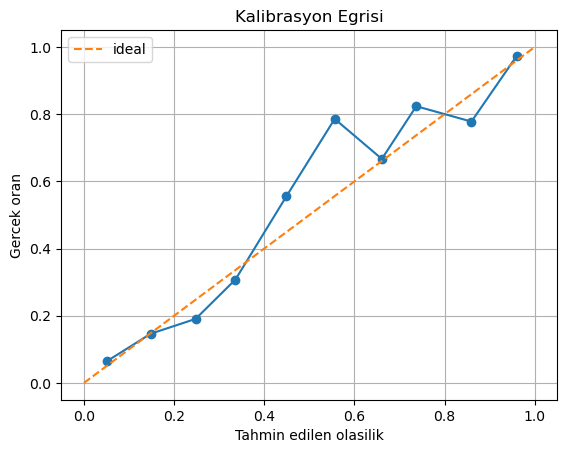

In [14]:
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt

true_probs, pred_probs = calibration_curve(y_test, probs, n_bins=10)

plt.plot(pred_probs, true_probs, marker='o')
plt.plot([0, 1], [0, 1], linestyle='--', label='ideal')
plt.xlabel("Tahmin edilen olasilik")
plt.ylabel("Gercek oran")
plt.title("Kalibrasyon Egrisi")
plt.legend()
plt.grid()
plt.show()

Yukarƒ±daki kalibrasyon eƒürisi ve Brier skoru ≈üunlarƒ± ifade ediyor.

Yorumlar:
* Kalibrasyon Eƒürisi: Grafik, tahmin edilen olasƒ±lƒ±klar(x) ile ger√ßekle≈üen oranlarƒ±(y) kar≈üƒ±la≈ütƒ±rƒ±r.
  * Eƒüri kesikli turuncu √ßizgiye (m√ºkkemmel kalibrasyon √ßizgisi) ne kadar yakƒ±nsa, modelin tahmin ettiƒüi olasƒ±lƒ±klar ger√ßek olasƒ±lƒ±klarƒ± o kadar iyi yansƒ±tƒ±r.
  * Eƒüri √ßok sapmƒ±yorsa model iyi kalibre edilmi≈ütir.
* Brier Skoru: 0.1149 gibi d√º≈ü√ºk bir deƒüer √ßƒ±ktƒ±.
  * Bu, modelin olasƒ±lƒ±k tahminlerinin doƒüruya olduk√ßa yakƒ±n olduƒüunu g√∂sterir.
  * Brier skoru 0'a ne kadar yakƒ±nsa o kadar iyidir.

Kullanƒ±lan Y√∂ntemler
| Y√∂ntem               | A√ßƒ±klama                                                              |
| -------------------- | --------------------------------------------------------------------- |
| **Sigmoid**          | Logistic Regression benzeri eƒüriyle d√ºzeltir.                         |
| **Isotonic**         | Serbest, monoton artan eƒüri. Daha esnektir ama daha fazla veri ister. |
| **Platt Scaling**    | Logistic regression ile kalibrasyon (sigmoid).                        |
| **Beta Calibration** | Olasƒ±lƒ±k daƒüƒ±lƒ±mƒ±nƒ± beta fonksiyonu ile d√ºzeltir (ileri d√ºzey).       |

A≈üaƒüƒ±da kalibrasyon kar≈üƒ±la≈ütƒ±rmasƒ± yapacaƒüƒ±z.

Log-loss (kalibrasyonsuz): 0.08275508360411982
Log-loss (sigmoid): 0.08238214499859457
Log-loss (isotonic): 0.537034051944052


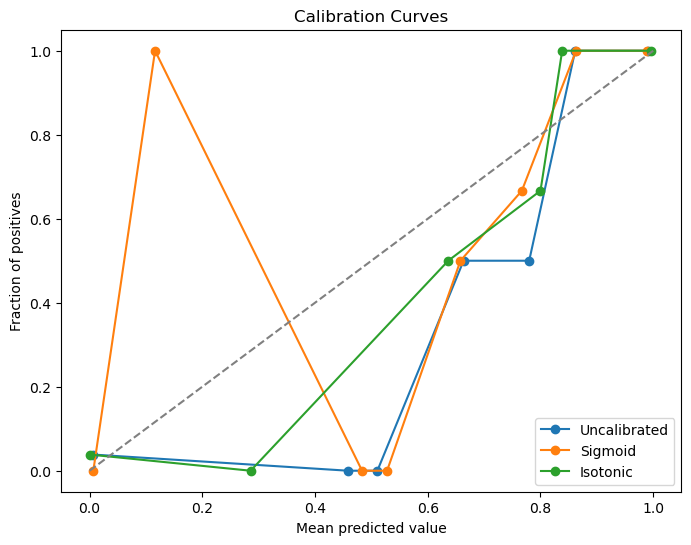

In [16]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.metrics import log_loss, brier_score_loss
import matplotlib.pyplot as plt

# Veri seti
data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, random_state=42)

# Kalibrasyonsuz model
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)
probs_uncalibrated = model.predict_proba(X_test)[:,1]

# Kalibrasyon sigmoid (Platt scaling)
calibrated_sigmoid = CalibratedClassifierCV(model, method='sigmoid', cv='prefit')
calibrated_sigmoid.fit(X_train, y_train)
probs_sigmoid = calibrated_sigmoid.predict_proba(X_test)[:,1]

# Kalibrasyon isotonic
calibrated_isotonic = CalibratedClassifierCV(model, method='isotonic', cv='prefit')
calibrated_isotonic.fit(X_train, y_train)
probs_isotonic = calibrated_isotonic.predict_proba(X_test)[:,1]

# Log-loss kar≈üƒ±la≈ütƒ±rmasƒ±
print("Log-loss (kalibrasyonsuz):", log_loss(y_test, probs_uncalibrated))
print("Log-loss (sigmoid):", log_loss(y_test, probs_sigmoid))
print("Log-loss (isotonic):", log_loss(y_test, probs_isotonic))

# Kalibrasyon eƒürisi √ßizimi
plt.figure(figsize=(8,6))

for probs, label in zip([probs_uncalibrated, probs_sigmoid, probs_isotonic],
                        ['Uncalibrated', 'Sigmoid', 'Isotonic']):
    fraction_of_positives, mean_predicted_value = calibration_curve(y_test, probs, n_bins=10)
    plt.plot(mean_predicted_value, fraction_of_positives, marker='o', label=label)

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('Mean predicted value')
plt.ylabel('Fraction of positives')
plt.title('Calibration Curves')
plt.legend()
plt.show()


Log-loss Sonu√ßlarƒ±mƒ±z:
| Model              | Log-loss Deƒüeri |
| ------------------ | --------------- |
| Kalibrasyonsuz     | 0.08276         |
| Sigmoid Kalibreli  | 0.08238 ‚úÖ       |
| Isotonic Kalibreli | 0.53703 ‚ùå       |

Yorumlar:
* Sigmoid, az ama anlamlƒ± bir geli≈üme saƒülamƒ±≈ü. Bu y√∂ntemin Logistic Regression'la uyumlu √ßalƒ±≈ütƒ±ƒüƒ± bilinir √ß√ºnk√º Logistic Regression zaten sigmoid temelli tahmin yapar.
* Isotonic, log-loss a√ßƒ±sƒ±ndan k√∂t√º sonu√ß verdi. Bu genelde:
  * Eƒüitim verisinde a≈üƒ±rƒ± uyum (overfitting) olduƒüunda,
  * Veya veri seti k√º√ß√ºk olduƒüunda g√∂r√ºl√ºr.
  * Ayrƒ±ca isotonic √ßok esnek bir y√∂ntem olduƒüu i√ßin bazƒ± durumlarda modelin g√ºvenirliƒüini bozabilir.
  
Ne yapabiliriz?
* Daha fazla veriyle isotonic kalibrasyon daha iyi sonu√ß verebilir.
* Ba≈üka modellerle (√∂rneƒüin: RandomForest, SVM) aynƒ± deneyi yaparsak kalibrasyonun etkisini kar≈üƒ±la≈ütƒ±rabiliriz.
* Kalibrasyon sonrasƒ± sadece log-loss deƒüil Brier Score, ROC AUC gibi farklƒ± metriklere de bakabiliriz.

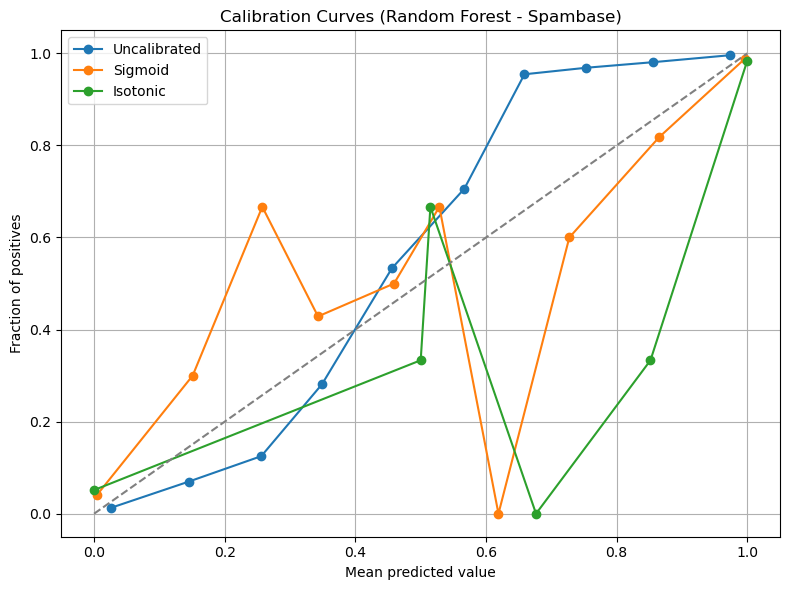

üî¢ Log Loss Sonu√ßlarƒ±:
Uncalibrated: 0.1932
Sigmoid: 0.1833
Isotonic: 1.3431

üåßÔ∏è Brier Score Sonu√ßlarƒ±:
Uncalibrated: 0.0414
Sigmoid: 0.0370
Isotonic: 0.0415


In [18]:
from sklearn.datasets import fetch_openml
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss, brier_score_loss
import matplotlib.pyplot as plt

# üì• 1. Veri setini y√ºkle
X, y = fetch_openml("spambase", version=1, return_X_y=True, as_frame=False, parser='auto')

# üßº 2. Etiketleri sayƒ±sal tipe d√∂n√º≈üt√ºr
y = y.astype(int)

# ‚úÇÔ∏è 3. Eƒüitim-test ayrƒ±mƒ±
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# üå≤ 4. Kalibrasyonsuz RandomForest modeli
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
probs_uncalibrated = rf_model.predict_proba(X_test)[:, 1]

# üîÅ 5. Sigmoid kalibrasyon
rf_sigmoid = CalibratedClassifierCV(rf_model, method='sigmoid', cv='prefit')
rf_sigmoid.fit(X_train, y_train)
probs_sigmoid = rf_sigmoid.predict_proba(X_test)[:, 1]

# üîÄ 6. Isotonic kalibrasyon
rf_isotonic = CalibratedClassifierCV(rf_model, method='isotonic', cv='prefit')
rf_isotonic.fit(X_train, y_train)
probs_isotonic = rf_isotonic.predict_proba(X_test)[:, 1]

# üìâ 7. Log-loss ve Brier Score sonu√ßlarƒ±
log_loss_results = {
    "Uncalibrated": log_loss(y_test, probs_uncalibrated),
    "Sigmoid": log_loss(y_test, probs_sigmoid),
    "Isotonic": log_loss(y_test, probs_isotonic)
}

brier_score_results = {
    "Uncalibrated": brier_score_loss(y_test, probs_uncalibrated),
    "Sigmoid": brier_score_loss(y_test, probs_sigmoid),
    "Isotonic": brier_score_loss(y_test, probs_isotonic)
}

# üìà 8. Kalibrasyon eƒürisi √ßizimi
plt.figure(figsize=(8, 6))
for probs, label in zip([probs_uncalibrated, probs_sigmoid, probs_isotonic],
                        ['Uncalibrated', 'Sigmoid', 'Isotonic']):
    frac_pos, mean_pred = calibration_curve(y_test, probs, n_bins=10)
    plt.plot(mean_pred, frac_pos, marker='o', label=label)

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('Mean predicted value')
plt.ylabel('Fraction of positives')
plt.title('Calibration Curves (Random Forest - Spambase)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# üîé 9. Sonu√ßlarƒ± yazdƒ±r
print("üî¢ Log Loss Sonu√ßlarƒ±:")
for k, v in log_loss_results.items():
    print(f"{k}: {v:.4f}")

print("\nüåßÔ∏è Brier Score Sonu√ßlarƒ±:")
for k, v in brier_score_results.items():
    print(f"{k}: {v:.4f}")


≈ûimdi Random Forest modeliyle Spambase veri seti (spam e-posta verileri) √ºzerinde yapƒ±lan kalibrasyon kar≈üƒ±la≈ütƒ±rmasƒ± sonu√ßlarƒ±na bakalƒ±m.

Log-loss Sonu√ßlarƒ±
| Model            | Log Loss ‚Üì                          |
| ---------------- | ----------------------------------- |
| **Uncalibrated** | 0.1932                              |
| **Sigmoid**      | **0.1833** ‚úÖ *(En iyi)*             |
| **Isotonic**     | 1.3431 ‚ùå *(√áok k√∂t√º kalibre olmu≈ü)* |

Yorum:
* Log-loss, modelin olasƒ±lƒ±k tahminlerinin ne kadar "kesin" ve doƒüru olduƒüuna bakar.
  * Daha d√º≈ü√ºk log-loss = daha iyi kalibrasyon
* Sigmoid Kalibrasyon, en iyi sonucu vermi≈ü. Yani modelin tahmin olasƒ±lƒ±klarƒ±nƒ± daha doƒüru ha≈üe getirmi≈ü.
* Isotonic, bu veri setinde a≈üƒ±rƒ± uyumlanmƒ±≈ü (overfitting yapmƒ±≈ü olabilir), bu y√ºzden log-loss √ßok k√∂t√º.

Brier Score Sonu√ßlarƒ±
| Model            | Brier Score ‚Üì   |
| ---------------- | --------------- |
| **Uncalibrated** | 0.0414          |
| **Sigmoid**      | **0.0370** ‚úÖ    |
| **Isotonic**     | 0.0415        ‚ùå |

Yorum:
* Brier skoru, olasƒ±lƒ±klarƒ±n ne kadar uzak olduƒüunu √∂l√ßer. Log-loss'a g√∂re daha naziktir ama yine "d√º≈ü√ºk" olmasƒ± iyidir.
* Sigmoid yine en iyisi √ß√ºnk√º daha doƒüru olasƒ±lƒ±k tahminleri veriyor.
* Isotonic, burada da k√∂t√º sonu√ß veriyor. Bu da bize isotonic'in bu veri seti ve model i√ßin uygun olmadƒ±ƒüƒ±nƒ± g√∂steriyor.

Genel Deƒüerlendirme:
* Sigmoid kalibrasyon, hem log loss hem de brier score a√ßƒ±sƒ±ndan net en iyi y√∂ntem olmu≈ü.
* Isotonic, bu √∂rnekte Random Forest + Spambase kombinasyonuyla uygun √ßalƒ±≈ümamƒ±≈ü, muhtemelen a≈üƒ±rƒ± uyum (overfitting) yapmƒ±≈ü.
* Bu sonu√ßlar bize g√∂steriyor ki: her veri setinde her kalibrasyon y√∂ntemi iyi sonu√ß vermez. Her durumu denemek gerekir.

Imbalanced Dataset Handling

Problem:
* Bir sƒ±nƒ±f (√∂rneƒüin 1) diƒüerine g√∂re √ßok azsa, model genellikle hep √ßoƒüunluk sƒ±nƒ±fƒ± (0) tahmin eder ve doƒüruluk y√ºksek g√∂r√ºnse bile ba≈üarƒ±sƒ±z bir model ortaya √ßƒ±kar.

√á√∂z√ºm 1:
* Scikit-Learn modellerinde, nadir sƒ±nƒ±flara daha fazla √∂nem vermesi i√ßin aƒüƒ±rlƒ±k atayabiliriz.
* 'balanced' dersek, sƒ±nƒ±flarƒ±n frekansƒ±na g√∂re otomatik olarak aƒüƒ±rlƒ±k verir.
* Alternatif olarak class_weight={0:1, 1:5} gibi elle aƒüƒ±rlƒ±k da verebiliriz.
* Bu y√∂ntem modelin ceza sistemini deƒüi≈ütirerek nadir sƒ±nƒ±flarƒ± daha fazla "√∂nemsemesini" saƒülar.

In [3]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight='balanced')

√á√∂z√ºm 2: SMOTE (Synthetic Minority Oversampling Technique)
* SMOTE, azƒ±nlƒ±k sƒ±nƒ±fƒ± i√ßin sentetik √∂rnekler √ºreterek veriyi dengeler.
* Bu i≈ülem sonucunda azƒ±nlƒ±k sƒ±nƒ±fƒ±n √∂rnek sayƒ±sƒ±, √ßoƒüunlukla e≈üitlenmi≈ü olur.
* imblearn k√ºt√ºphanesindendir. (pip install imbalanced-learn gerekebilir.)

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

#eƒüitim verisi olu≈ütur
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

#SMOTE uygula
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

class_weight vs. SMOTE
| √ñzellik             | `class_weight`              | `SMOTE`                     |
| ------------------- | --------------------------- | --------------------------- |
| Y√∂ntem              | Modelin cezasƒ±nƒ± deƒüi≈ütirir | Veriye sentetik √∂rnek ekler |
| Hafƒ±za              | Az kullanƒ±r                 | Daha fazla bellek t√ºketir   |
| A≈üƒ±rƒ± Uydurma Riski | Daha az                     | Daha fazla olabilir         |
| Destek              | √áoƒüu model destekler        | Ek k√ºt√ºphane gerekir        |


Custom Scorer ve Metric Tanƒ±mlamak

Neden √ñzek Skor Tanƒ±mlarƒ±z?
* Bazƒ± durumlarda accuracy, f1, recall, precision gibi hazƒ±r metrikler ihtiyacƒ±mƒ±zƒ± kar≈üƒ±lamayabilir. √ñrneƒüin:
  * Bir sƒ±nƒ±fƒ± yanlƒ±≈ü tahmin etmek √ßok daha √∂nemliyse (√∂rneƒüin hasta ki≈üiyi saƒülƒ±klƒ± zannetmek.)
  * Regresyonda √∂zel bir i≈ü kuralƒ± varsa
  * Modeli kendi √∂zel ko≈üullarƒ±na g√∂re deƒüerlendirmek istiyorsak.

Classification i√ßin Custom Scorer √ñrneƒüi
* Scikit-learn'√ºn make_scorer fonksiyonuyla kendi metrik fonksiyonumuzu skorlama fonksiyonuna √ßevirebiliriz.

√ñrneƒüin: F2-Score (Recall Aƒüƒ±rlƒ±klƒ±)

In [11]:
from sklearn.metrics import make_scorer, fbeta_score

f2_scorer = make_scorer(fbeta_score, beta=2)

Bu f2_scorer, GridSearchCV gibi fonksiyonlara verilebilir:

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

grid = GridSearchCV(LogisticRegression(), param_grid, scoring=f2_scorer)

Regresyon i√ßin Custom Metric √ñrneƒüi
* Bu skor yine GridSearchCV gibi s√ºre√ßlerde kullanƒ±labilir.
* √ñrneƒüin: "Tahmin ger√ßek deƒüerin %10'undan fazla sapmasƒ±n" gibi kuralƒ±mƒ±z varsa:

In [23]:
import numpy as np
from sklearn.metrics import make_scorer

def within_10_percent(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred) / y_true < 0.10)

custom_reg_scorer = make_scorer(within_10_percent, greater_is_better=True)

ƒ∞pu√ßlarƒ±
* make_scorer ile tanƒ±mlarken:
  * greater_is_better=True: skor b√ºy√ºkse iyidir. (doƒüruluk gibi)
  * greater_is_better=False: skor k√º√ß√ºkse iyidir. (hata gibi)

√ñrnek: Negatif MAE Skoru:

In [26]:
def my_mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

neg_mae = make_scorer(my_mae, greater_is_better=False)

In [28]:
from sklearn.datasets import make_classification, make_regression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import make_scorer, fbeta_score, mean_squared_error
import numpy as np

# 1Ô∏è‚É£ Classification i√ßin veri seti olu≈ütur
X_class, y_class = make_classification(n_samples=500, n_features=5, weights=[0.7], random_state=42)
Xc_train, Xc_test, yc_train, yc_test = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# F2-score custom scorer (Recall aƒüƒ±rlƒ±klƒ±)
f2_scorer = make_scorer(fbeta_score, beta=2)

# GridSearch ile Logistic Regression (classification)
param_grid_class = {"C": [0.01, 0.1, 1]}
grid_class = GridSearchCV(LogisticRegression(solver='liblinear'), param_grid_class, scoring=f2_scorer, cv=5)
grid_class.fit(Xc_train, yc_train)

# 2Ô∏è‚É£ Regression i√ßin veri seti olu≈ütur
X_reg, y_reg = make_regression(n_samples=500, n_features=5, noise=10.0, random_state=42)
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Custom metric: y√ºzde 10‚Äôdan az sapan tahminlerin oranƒ±
def within_10_percent(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred) / np.abs(y_true) < 0.10)

custom_reg_scorer = make_scorer(within_10_percent, greater_is_better=True)

# GridSearch ile Linear Regression (regression)
param_grid_reg = {}
grid_reg = GridSearchCV(LinearRegression(), param_grid_reg, scoring=custom_reg_scorer, cv=5)
grid_reg.fit(Xr_train, yr_train)

# Sonu√ßlarƒ± d√∂nd√ºr
{
    "classification_best_score (F2)": grid_class.best_score_,
    "classification_best_params": grid_class.best_params_,
    "regression_best_score (within_10%)": grid_reg.best_score_
}


{'classification_best_score (F2)': 0.7684253489880088,
 'classification_best_params': {'C': 1},
 'regression_best_score (within_10%)': 0.5675000000000001}

Sƒ±nƒ±flandƒ±rma ve Regresyon i√ßin birer tane custom scorer tanƒ±mladƒ±k.

Classification (Sƒ±nƒ±flandƒ±rma)
* Kullanƒ±lan √∂zel skor: F2_score (Recall aƒüƒ±rlƒ±klƒ±, hatalarƒ± daha az ka√ßƒ±rmak istiyorsak tercih edilir.)
* En iyi C parametresi: 1
* En iyi F2 skoru: 0.7684 (5 katlƒ± √ßapraz doƒürulama ortalamasƒ±)

Regression (Regresyon)
* Kullanƒ±lan √∂zel metrik: within_10_percent: Ger√ßek deƒüerin %10'undan az sapan tahminlerin oranƒ±
* Skor (5-fold cross-val ortalamasƒ±): 0.5675: Tahminlerin %56.75'i ger√ßek deƒüerin %10 yakƒ±nƒ±nda

Boyut ƒ∞ndirgeme (Dimensionality Reduction)

Bu konu √∂zellikle √ßok sayƒ±da √∂zelliƒüe (feature) sahip veri setlerinde √ßok √∂nemlidir. Hem g√∂rselle≈ütirme hem de modelin daha verimli √ßalƒ±≈ümasƒ± a√ßƒ±sƒ±ndan avantaj saƒülar.

PCA (Principal Component Analysis) - Temel Bile≈üen Analizi

Ne i≈üe yarar?
* Y√ºksek boyutlu veriyi daha az boyuta indirger (√∂rneƒüin 10 √∂zelliƒüi 2'ye d√º≈ü√ºr√ºr.)
* Bu sayede:
  * G√∂rselle≈ütirme yapƒ±labilir.
  * Model daha hƒ±zlƒ± eƒüitilir.
  * √ñzellikler arasƒ±ndaki korelasyon ortadan kaldƒ±rƒ±lƒ±r.

Nasƒ±l √ßalƒ±≈üƒ±r?
* Yeni eksenler (principal components) olu≈üturur.
* Bu eksenler, veri varyansƒ±nƒ± en iyi ≈üekilde koruyacak ≈üekilde sƒ±ralanƒ±r.
* 1. bile≈üen verideki varyansƒ±n en b√ºy√ºk kƒ±smƒ±nƒ±, 2. bile≈üen ikinci b√ºy√ºk kƒ±smƒ±nƒ± ta≈üƒ±r.
 
t-SNE (t-distributed Stochastic Neighbor Embedding)

Ne i≈üe yarar?
* Veriyi √∂zellikle g√∂rselle≈ütirme amacƒ±yla 2D ya da 3D'ye indirgemek i√ßin kullanƒ±lƒ±r.
* Karma≈üƒ±k yapƒ±larƒ± (√∂rneƒüin k√ºmelenmeleri) √ßok iyi ortaya √ßƒ±karƒ±r.

Farkƒ± ne?
* t-SNE, verinin i√ßindeki benzerlikleri koruyarak bir projeksiyon yapar.
* Yava≈ü √ßalƒ±≈üƒ±r, ama √∂zellikle g√∂rselle≈ütirme i√ßin PCA'dan daha etkileyici olabilir.

PCA Uygulamalƒ± √ñrnek (2 Boyuta ƒ∞ndirgeme):

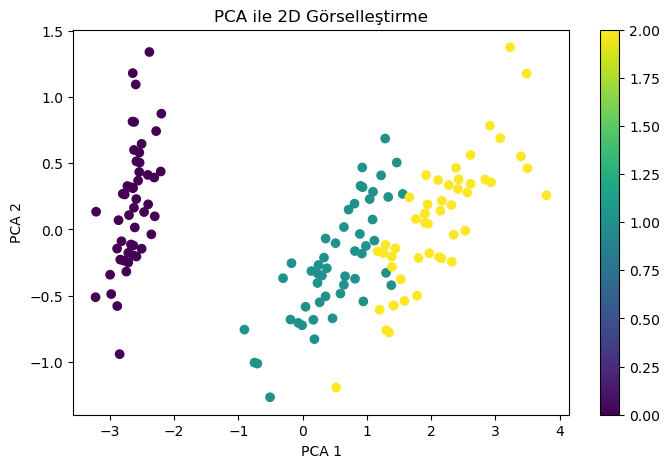

In [34]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

#veri
data = load_iris()
X = data.data
y = data.target

#PCA ile 2 boyuta indir
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

#G√∂rselle≈ütir
plt.figure(figsize=(8, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('PCA ile 2D G√∂rselle≈ütirme')
plt.colorbar()
plt.show()

t-SNE Uygulamalƒ± √ñrnek

C:\Users\esrao\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\esrao\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\esrao\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\esrao\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\esrao\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreatePro

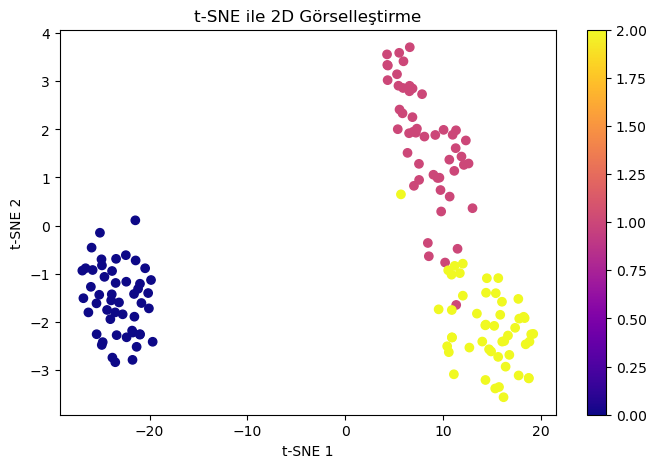

In [37]:
from sklearn.manifold import TSNE

#t-SNE ile indir
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X)

#G√∂rselle≈ütir
plt.figure(figsize=(8, 5))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='plasma')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('t-SNE ile 2D G√∂rselle≈ütirme')
plt.colorbar()
plt.show()

Ne Zaman Hangisini Kullanmalƒ±yƒ±z?
| Durum                                    | Tercih |
| ---------------------------------------- | ------ |
| Hƒ±zlƒ± ve anla≈üƒ±lƒ±r sonu√ß istiyorsan      | PCA    |
| Karma≈üƒ±k k√ºmeleri ayƒ±rt etmek istiyorsan | t-SNE  |
| Modelden √∂nce boyut azaltmak istiyorsan  | PCA    |
| Sadece g√∂rselle≈ütirme istiyorsan         | t-SNE  |


PCA (Principal Component Analysis) - Ana Bile≈üen Analizi

Ne yapar? 
* Verideki deƒüi≈ükenliƒüi (variance) en iyi ≈üekilde temsil eden yeni eksenler (bile≈üenler) olu≈üturur.
* Bu bile≈üenlerle orijinal veri boyutunu d√º≈ü√ºr√ºrken anlamlƒ± bilgiyi korumaya √ßalƒ±≈üƒ±r.

PCA √ßƒ±ktƒ±larƒ± nelerdir?
1. Explained Variance Ratio (A√ßƒ±klanan Varyans Oranƒ±)
   * [0.72, 0.23, 0.04, 0.01]
   * 1. bile≈üen verideki varyansƒ±n %72'sini a√ßƒ±klƒ±yor.
   * 2. bile≈üen %23'√ºn√º
   * Geri kalanlar √ßok az katkƒ±da bulunuyor.
   * Bu durumda 2 bile≈üenle toplam %95 varyans korunuyor, yani veriyi 4 boyuttan 2 boyuta d√º≈ü√ºrmek mantƒ±klƒ± olur.
2. PCA ile G√∂rselle≈ütirme
   * 2D scatter plot varsa (PC1 vs PC2), gruplar arasƒ± ayrƒ±m olup olmadƒ±ƒüƒ±na bakƒ±lƒ±r.
   * Sƒ±nƒ±flar k√ºmelenmi≈üse, modelleme i√ßin iyi sinyaldir.

t-SNE (t-distributed Stochastic Neighbor Embedding)

Ne yapar?
* √ñzellikle karma≈üƒ±k ve y√ºksek boyutlu verilerin g√∂rselle≈ütirilmesi i√ßin √ßok uygundur.
* PCA gibi lineer deƒüil, non-lineer ili≈ükileri de yakalar.
* K√ºmeleme yapƒ±sƒ±nƒ± daha net g√∂sterir.

t-SNE √ßƒ±ktƒ±larƒ± nelerdir?

Scatter Plot (t-SNE 2D Projeksiyonu)
   * Her noktada 1 g√∂zlemi temsil eder, her renk sƒ±nƒ±flarƒ± temsil eder.
   * Eƒüer:
     * Aynƒ± sƒ±nƒ±ftaki √∂rnekler birbirine yakƒ±nsa
     * Farklƒ± sƒ±nƒ±flar ayrƒ± k√ºmeler ≈üeklindeyse

Bu √ßok g√ºzel bir ayrƒ±m olduƒüunu ve modelin sƒ±nƒ±flarƒ± √∂ƒürenebileceƒüini g√∂sterir.

PCA mƒ± t-SNE mi?
| √ñzellik                         | PCA        | t-SNE                        |
| ------------------------------- | ---------- | ---------------------------- |
| Temel yakla≈üƒ±m                  | Lineer     | Non-lineer                   |
| Hƒ±zlƒ± mƒ±?                       | √áok hƒ±zlƒ±  | Daha yava≈ü                   |
| Yorumlanabilir mi?              | Evet       | Hayƒ±r, a√ßƒ±klamak zordur      |
| G√∂rselle≈ütirme                  | Fena deƒüil | üî• Harika                    |
| Modelleme √∂ncesi kullanƒ±lƒ±r mƒ±? | Evet       | Hayƒ±r (sadece g√∂rsel ama√ßlƒ±) |

√ñzet:
* PCA: Boyut indirip modelde kullanabiliriz.
* t-SNE: Sadece g√∂rselle≈ütirme i√ßin kullanabiliriz. (√∂zellikle y√ºksek boyutlu ve karƒ±≈üƒ±k veride)

ROC ve PR (Precision-Recall) Eƒürileri
* Sƒ±nƒ±flandƒ±rma modellerinin performansƒ±nƒ± √∂zellikle dengesiz veri setlerinde √ßok daha net anlamamƒ±za yardƒ±mcƒ± olur.

1. ROC Eƒürisi (Receiver Operating Characteristic)

   Ne g√∂sterir?
   * True Positive Rate (TPR) yani Duyarlƒ±lƒ±k / Recall
   * False Positive Rate (FPR) √ºzerinden modelin farklƒ± e≈üiklerdeki ba≈üarƒ±sƒ±nƒ± g√∂sterir

   Neden √∂nemli?
   * Modelin farklƒ± e≈üik deƒüerlerindeki davranƒ±≈üƒ±nƒ± g√∂r√ºrs√ºn
   * Altƒ±ndaki alan (AUC = Area Under Curve) modelin genel performansƒ±nƒ± √∂zetler.
2. PR Eƒürisi (Precision - Recall Curve)

    Ne g√∂sterir?
   * Precision (kesinlik) ve Recall (duyarlƒ±lƒ±k) arasƒ±ndaki ili≈üki
   * √ñzellikle dengesiz veri setlerinde daha doƒüru yorum yapmamƒ±za olanak tanƒ±r.

Manuel ROC ve PR Eƒürisi √áizimi (√ñrnek Kod)

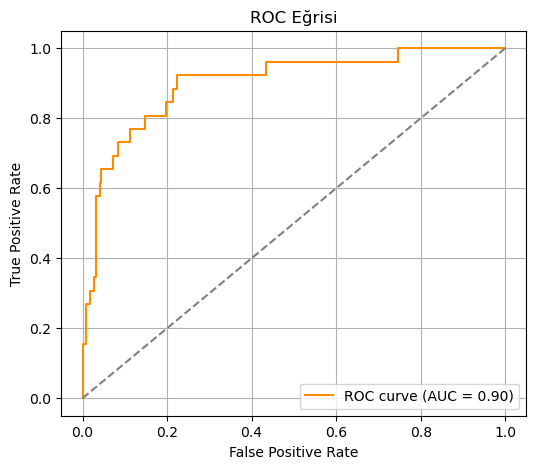

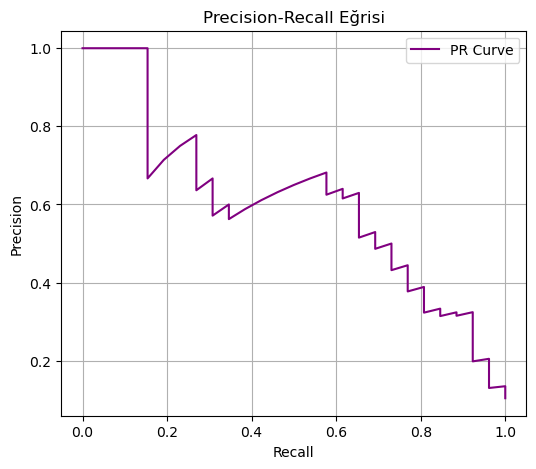

In [51]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, precision_recall_curve

#1. veriyi olu≈ütur
X, y = make_classification(n_samples=1000, n_classes=2, weights=[0.9, 0.1], random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

#2. modeli eƒüit
model = LogisticRegression()
model.fit(X_train, y_train)

#3. olasƒ±lƒ±k tahminlerini al
y_scores = model.predict_proba(X_test)[:, 1]

#4. ROC eƒürisi
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})", color="darkorange")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Eƒürisi")
plt.legend()
plt.grid(True)
plt.show()

#5. PR eƒürisi
precision, recall, _ = precision_recall_curve(y_test, y_scores)

plt.figure(figsize=(6, 5))
plt.plot(recall, precision, label="PR Curve", color="purple")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Eƒürisi")
plt.grid(True)
plt.legend()
plt.show()

Yorumu nasƒ±l yapƒ±lƒ±r?

ROC Eƒürisi:
* AUC = 1: M√ºkemmel model
* AUC > 0.9: √áok iyi
* AUC ~ 0.5: Rastgele tahmin

PR Eƒürisi:
* Eƒüri yukarƒ±da ve saƒüdaysa: iyi model
* D√º≈ü√ºk recall'da bile y√ºksek precision varsa: daha da iyi

Not: ROC ve PR eƒürileri √∂zellikle dengesiz sƒ±nƒ±flƒ± veri setlerinde √ßok ≈üey anlatƒ±r. Eƒüer pozitif sƒ±nƒ±f azsa (√∂rneƒüin hastalƒ±k te≈ühis, dolandƒ±rƒ±cƒ±lƒ±k vs.), PR eƒürisi daha doƒüru kƒ±yas saƒülar.

AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA

üß† XGBoost, LightGBM: daha g√º√ßl√º modeller (daha sonra ge√ßilir)

na kadar √ßok saƒülam bir 1. seviye ML temeli kurduk. Geri kalanlar daha √ßok:

Derinlemesine optimizasyon (√∂rneƒüin XGBoost, CatBoost)

Model deployment (√∂rneƒüin joblib, Flask)

Karma≈üƒ±k projelerde kullanƒ±lacak geli≈ümi≈ü teknikler
Bu noktada ‚Äúg√ºzel bir proje‚Äù yaparak bu bilgileri peki≈ütir.

Sonrasƒ±nda ‚Äúmodellerin i√ßini a√ßma‚Äù (√∂rneƒüin feature importance, SHAP, LIME gibi a√ßƒ±klanabilir yapay zeka) gibi konulara bakabilirsin.

XGBoost & LightGBM Nedir?

Bunlar aslƒ±nda gradient boosting algoritmalarƒ±nƒ±n geli≈ümi≈ü versiyonlarƒ±dr. 

Ama√ßlarƒ± aynƒ±: bir√ßok zayƒ±f tahminciden (karar aƒüa√ßlarƒ±) g√º√ßl√º model olu≈üturmak. 

Farklarƒ± ise daha hƒ±zlƒ±, daha doƒüru ve daha esnek olmalarƒ±.

XGBoost (Extreme Gradient Boosting)
* En pop√ºler boosting algoritmalarƒ±ndan biri.
* Aƒüa√ß tabanlƒ± bir model.
* Overfitting'e kar≈üƒ± regularization (L1 ve L2 ceza) i√ßerir.
* GPU desteklidir. (hƒ±zlƒ±!)
* Kullanƒ±mƒ± (xgboost paketinden):

In [ ]:
from xgboost import XGBClassifer

model = XGBClassifier()
model.fit(X_train, y_train)

LightGBM (Light Gradient Boosting Machine)
* Microsoft tarafƒ±ndan geli≈ütirildi.
* B√ºy√ºk veri setlerinde daha hƒ±zlƒ±.
* XGBoost'tan farklƒ± olarak veriyi √∂nceden sƒ±ralayƒ±p histogram √ßƒ±karƒ±r (daha hƒ±zlƒ± ve az bellek).
* √ñzellikle √ßok fazla √∂zelliƒüi olan veri setlerinde √ßok ba≈üarƒ±lƒ±dƒ±r.
* Kullanƒ±mƒ± (lightgbm paketinden):

In [ ]:
from lightgbm import LGBMClassifier

model = LGBMClassifier()
model.fit(X_train, y_train)

XGBoost vs LightGBM
| √ñzellik            | XGBoost    | LightGBM         |
| ------------------ | ---------- | ---------------- |
| Hƒ±z                | Orta       | Daha hƒ±zlƒ±       |
| Bellek kullanƒ±mƒ±   | Daha fazla | Daha az          |
| Performans         | √áok iyi    | Genelde daha iyi |
| GPU Desteƒüi        | Var        | Var              |
| B√ºy√ºk veri setleri | Uygun      | √áok uygun        |


Ne zaman kullanƒ±lmalƒ±?
* Veri b√ºy√ºkse ve model yava≈üsa: LightGBM
* Hassas ayarlarla y√ºksek performans gerekirse: XGBoost